<a href="https://colab.research.google.com/github/PerdikosFilippos/MNIST-Digit-Classification-using-a-Neural-Network/blob/main/MNIST_Digit_Classification_using_a_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

#Load MNIST dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [3]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60000 images
Testing data = 10000 images

Image dimensions = 28x28

Grayscale images --> 1 channel

In [4]:
#Printing the nth image

print(X_train[3000])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  25  91 174 254 254
  255 254 156  27   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   9  84 212 254 254 224 216
  216 219 254 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  39 172 254 250 161  5

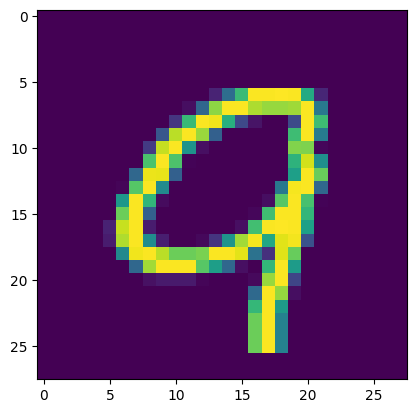

9


In [5]:
#Dispaly the image

plt.imshow(X_train[3000])
plt.show()

#print corresponding label
print(Y_train[3000])

#Image Labels

In [6]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [7]:
#Unique values in Y_train
print(np.unique(Y_train))

#Unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding.

Alll images have the same dimensions. If not, we have to resize them.

#Scaling the values

In [8]:
# scaling the values ONLY X

X_train = X_train/255
X_test = X_test/255

#Building the Neural Network (Not CNN or RNN. Simple Neural Network)

In [9]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [10]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Training the Neural Network

In [11]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2891 - accuracy: 0.9171
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1333 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1000 - accuracy: 0.9695
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0831 - accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0681 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0617 - accuracy: 0.9808
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0519 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0473 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0403 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.03

Accuracy using Training data is 98.8%

#Accuracy on TEST DATA

In [12]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1117 - accuracy: 0.9704
0.9703999757766724


Accuracy using Training data is 98.8%

In [13]:
print(X_test.shape)

(10000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

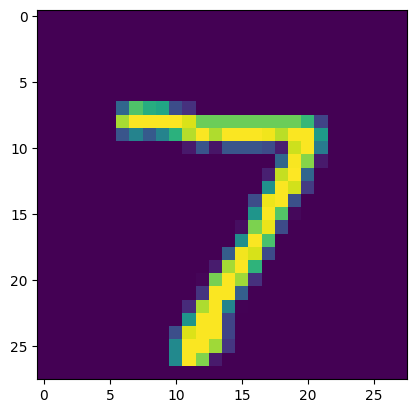

In [14]:
#First data point in X_test
plt.imshow(X_test[0])
plt.show

In [15]:
print(Y_test[0])

7


In [16]:
Y_pred = model.predict(X_test) #Gives the prediction probability of each class for that particulas data point e.g What are the probabilities of the predicted number to be something else

313/313 [==============================] - 2s 4ms/step


In [17]:
print(Y_pred.shape)

(10000, 10)


In [18]:
print(Y_pred[0])

[2.0800951e-01 9.5462002e-02 1.1246769e-01 9.9013638e-01 3.3769954e-04
 2.7941296e-01 9.7543671e-07 9.9999851e-01 7.7224873e-02 2.8773990e-02]


In [19]:
#Converting the prediction probabilities to class label = WHAT NUMBER IS IT?

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [21]:
#Converting the prediction probabilities to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

#Confusion Matrix

In [22]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [23]:
print(conf_mat)

tf.Tensor(
[[ 953    0    1    1    0    3   15    4    3    0]
 [   0 1118    3    2    0    1    4    0    6    1]
 [   3    5  992   13    4    0    5    6    4    0]
 [   0    2    3  979    0   17    0    1    1    7]
 [   0    0    3    0  957    3   11    2    1    5]
 [   3    0    0    7    2  874    2    1    1    2]
 [   0    3    2    0    3   11  938    0    1    0]
 [   0    4   11    6    3    0    0  991    3   10]
 [   3    0    1    9    6   12    2    3  934    4]
 [   2    2    0    5   22    5    1    5    2  965]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

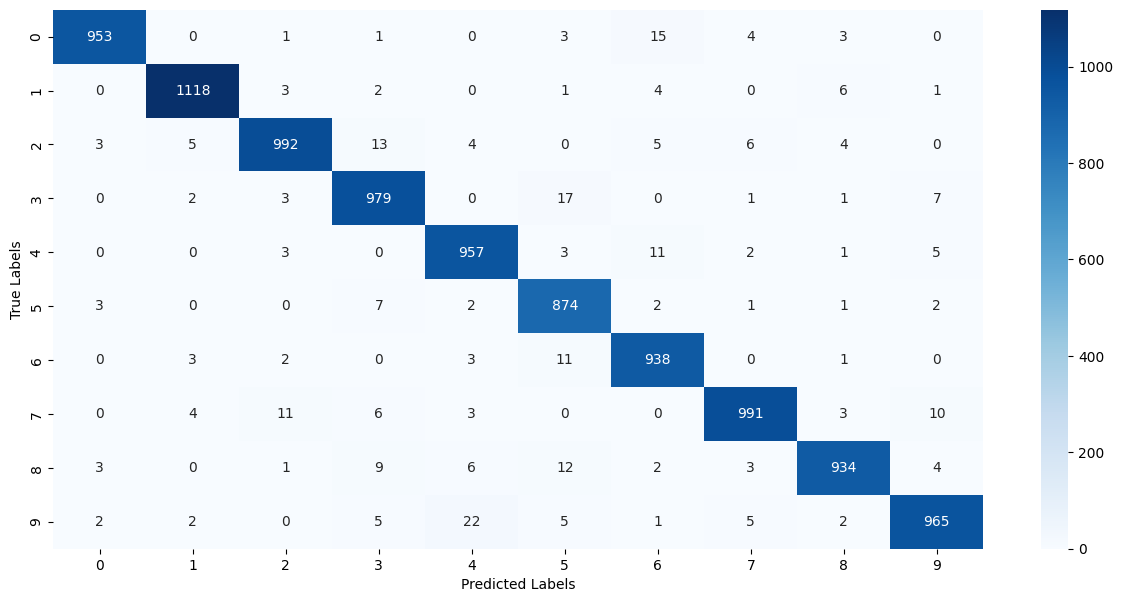

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

#Building Predictive System:

**Prediction** image link: https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67

In [25]:
input_image_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [26]:
type(input_image)

numpy.ndarray

In [27]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


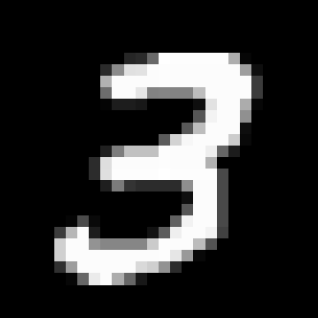

In [28]:
cv2_imshow(input_image)

In [29]:
input_image.shape

(318, 318, 3)

In [30]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [31]:
grayscale.shape

(318, 318)

In [32]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [33]:
input_image_resize.shape

(28, 28)

In [34]:
cv2_imshow(input_image_resize)

In [35]:
input_image_resize = input_image_resize/255

In [36]:
type(input_image_resize)

numpy.ndarray

In [37]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [38]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 21ms/step
[[4.2442713e-11 1.8849437e-01 8.8815385e-01 1.0000000e+00 8.9326163e-10
  9.8112571e-01 3.1455578e-17 2.3686884e-02 9.9919856e-01 7.6287669e-01]]


In [39]:
input_pred_label = np.argmax(input_prediction)

In [40]:
print(input_pred_label)

3


#Altogether:

Path of the image to be predicted: /content/MNIST_digit.png


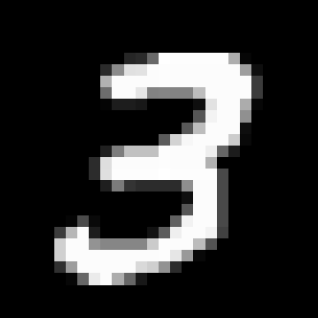

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  3
[[4.2442713e-11 1.8849437e-01 8.8815385e-01 1.0000000e+00 8.9326163e-10
  9.8112571e-01 3.1455578e-17 2.3686884e-02 9.9919856e-01 7.6287669e-01]]


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)
print('The chances of it being correct: ', input_prediction)